# Worksheet 19

Name:  Hao Qi, Hui Zheng  
UID:  U96305250, U80896784  

### Topics

- Linear Model Evaluation

## Linear Model Evaluation

Notice that R^2 only increases with the number of explanatory variables used. Hence, there is a need for an adjusted R^2 that penalizes insignificant explanatory variables.

In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

SAMPLE_SIZE = 100
beta = [1, 5]
X = -10.0 + 10.0 * np.random.random(SAMPLE_SIZE)
Y = beta[0] + beta[1] * X + np.random.randn(SAMPLE_SIZE)

for i in range(1, 15):
    X_transform = PolynomialFeatures(degree=i, include_bias=False).fit_transform(X.reshape(-1, 1))
    model = LinearRegression()
    model.fit(X_transform, Y)
    print(model.score(X_transform, Y))

0.9959248389311115
0.9959265922716827
0.9959282618869219
0.9959595370535802
0.9960793883076425
0.996113879908723
0.9961139757521474
0.9961408999650244
0.9961633766083485
0.9961712824617917
0.9963919984233067
0.9963920283756823
0.9963930750361523
0.9963723941375657


a) Hypothesis Testing Sandbox (follow along in class) [Notes](https://medium.com/@gallettilance/hypothesis-testing-almost-everything-you-need-to-know-ce812ded50b)

0.3125
[0, 1, 1, 0, 0]
0.3125


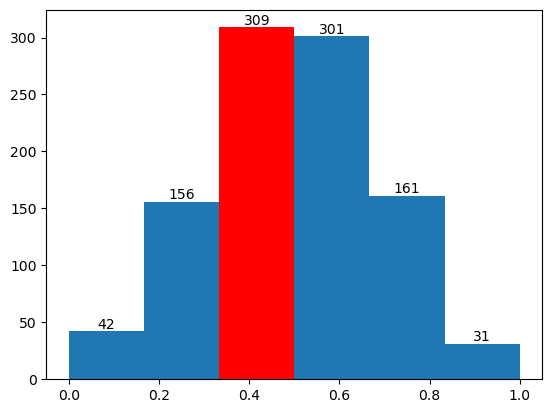

In [20]:
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt

flips = [1, 0, 0, 1, 0]

def num_successes(flips):
    return sum(flips)

print(binom.pmf(num_successes(flips), len(flips), 1/2))

SAMPLE_SIZE = 5
flips = [np.random.choice([0, 1]) for _ in range(SAMPLE_SIZE)]
print(flips)
print(binom.pmf(num_successes(flips), SAMPLE_SIZE, 1/2))

p_est = []

for _ in range(1000):
    flips = [np.random.choice([0, 1]) for _ in range(SAMPLE_SIZE)]
    p_est.append(sum(flips) / SAMPLE_SIZE)

fig, ax = plt.subplots()
_, bins, patches = ax.hist(p_est, bins=SAMPLE_SIZE + 1)
p = np.digitize([2/5], bins)
patches[p[0]-1].set_facecolor('r')
ax.bar_label(patches)
plt.show()

b) Plot a data set and the fitted line through the points when there is no relationship between X and y.

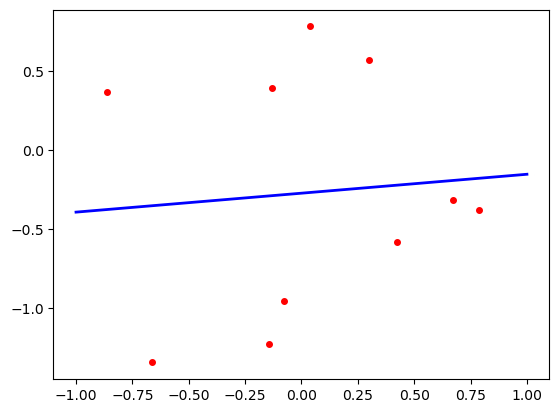

In [39]:
import numpy as np
import matplotlib.pyplot as plt

SAMPLE_SIZE = 10

xlin = -1.0 + 2.0 * np.random.random(SAMPLE_SIZE)
y = 0.0 * xlin + np.random.randn(SAMPLE_SIZE)   # set the coefficient to 0

intercept = np.ones(np.shape(xlin)[0])
X = np.array([intercept, xlin]).T
beta = np.linalg.inv(X.T @ X) @ X.T @ y

xplot = np.linspace(-1, 1, 20)
yestplot = beta[0] + beta[1] * xplot
plt.plot(xplot, yestplot, 'b-', lw=2)
plt.plot(xlin, y, 'ro', markersize=4)
plt.show()

c) Using the above code, plot a histogram of the parameter estimates for the slope after generating 1000 independent datasets. Comment on what the plot means. Increase the sample size to see what happens to the plot. Explain.

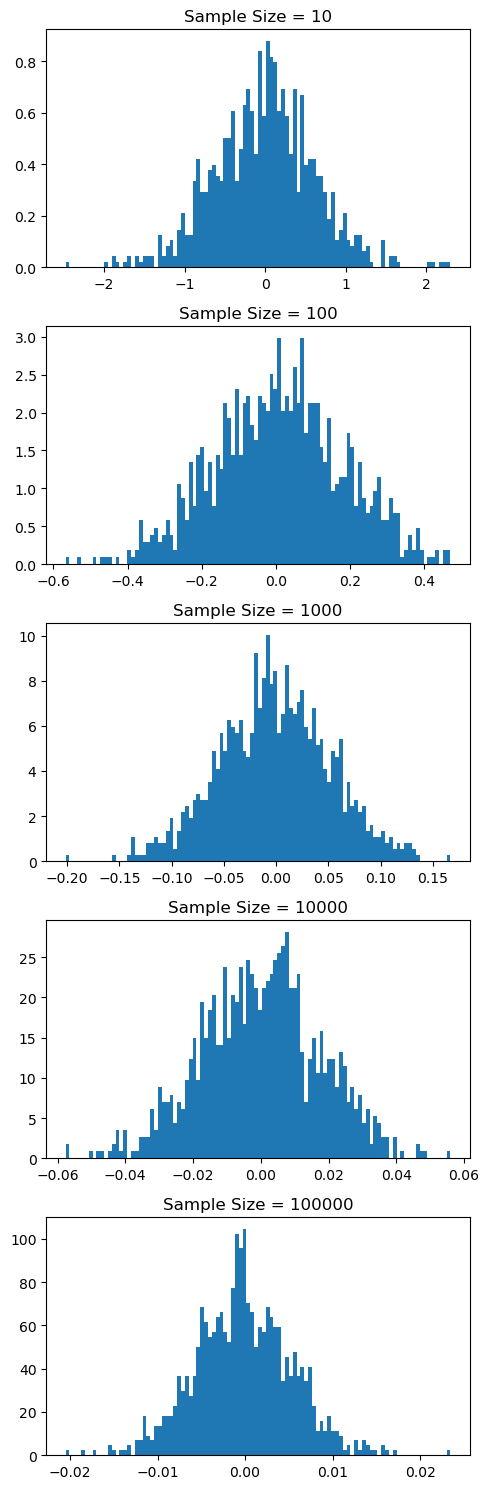

In [47]:
def simulate_slope_distribution(sample_size, num_simulations=1000):
    beta_hist = []
    for _ in range(num_simulations):
        xlin = -1.0 + 2.0 * np.random.random(sample_size)
        y = 0.0 * xlin + np.random.randn(sample_size)

        intercept = np.ones(np.shape(xlin)[0])
        X = np.array([intercept, xlin]).T
        beta = np.linalg.inv(X.T @ X) @ X.T @ y
        beta_hist.append(beta[1])
    return beta_hist

sample_sizes = [10, 100, 1000, 10000, 100000]
fig, axs = plt.subplots(len(sample_sizes), 1, figsize=(5, 15))

for i, sample_size in enumerate(sample_sizes):
    beta_hist = simulate_slope_distribution(sample_size)
    axs[i].hist(beta_hist, bins=100, density=True)
    axs[i].set_title(f"Sample Size = {sample_size}")
plt.tight_layout()
plt.show()

Each distribution is centered around the true slope value, which is 0 in this case. This indicates that the estimations are accurate on average, which aligns with the expectation that the ordinary least squares estimator is unbiased. The shape of each distribution is roughly normal (bell-shaped), which indicates that the sampling distribution of the estimate tends to be normally distributed.

The increasing sample size leads to a decrease in the variance of the beta estimates, making them more reliable. With a larger sample, outliers become less prominent, and the estimates cluster closer to the mean value. 

d) We know that:

$$\hat\beta-\beta \sim \mathcal{N}(0,\sigma^2 (X^TX)^{-1})$$

thus for each component $k$ of $\hat\beta$ (here there are only two - one slope and one intercept)

$$\hat\beta_k -\beta_k \sim \mathcal{N}(0, \sigma^2 S_{kk})$$

where $S_{kk}$ is the $k^\text{th}$ diagonal element of $(X^TX)^{-1}$. Thus, we know that 

$$z_k = \frac{\hat\beta_k -\beta_k}{\sqrt{\sigma^2 S_{kk}}} \sim \mathcal{N}(0,1)$$

Verify that this is the case through a simulation and compare it to the standard normal pdf by plotting it on top of the histogram. 

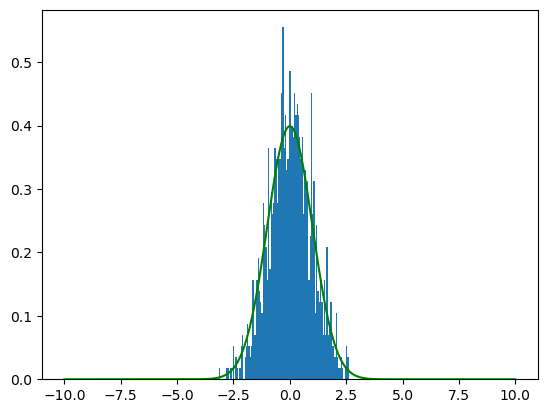

In [48]:
from scipy.stats import norm

SAMPLE_SIZE = 100

z_hist = []
for _ in range(1000):
    xlin = -1.0 + 2.0 * np.random.random(SAMPLE_SIZE)
    y = 0.0 * xlin + np.random.randn(SAMPLE_SIZE)

    intercept = np.ones(np.shape(xlin)[0])
    X = np.array([intercept, xlin]).T
    beta = np.linalg.inv(X.T @ X) @ X.T @ y
    s = np.linalg.inv(X.T @ X)[1][1]
    z = (beta[1]-0.0) / ((1.0*s)**0.5)  # since we use std normal distribution when generating y
    z_hist.append(z)

xs = np.linspace(-10, 10, 1000)
fig, ax = plt.subplots()
ax.hist(z_hist, bins=100, density=True)
ax.plot(xs, norm.pdf(xs, loc=0, scale=1), color='green')
plt.show()

The simulation fits the normal probability density function well in the graph above, verifying the correctness of the transformation. 

e) Above we normalized $\hat\beta$ by subtracting the mean and dividing by the standard deviation. While we know that the estimate of beta is an unbiased estimator, we don't know the standard deviation. So in practice when doing a hypothesis test where we want to assume that $\beta = 0$, we can simply use $\hat\beta$ in the numerator. However we don't know the standard deviation and need to use an unbiased estimate of the standard deviation instead. This estimate is the standard error `s`:

$$s = \sqrt{\frac{RSS}{n - p}}$$

where p is the number of parameters beta has (here there are 2 - one slope and one intercept). This normalized $\hat\beta$ can be shown to follow a t-distribution with `n-p` degrees of freedom. Verify this is the case with a simulation.

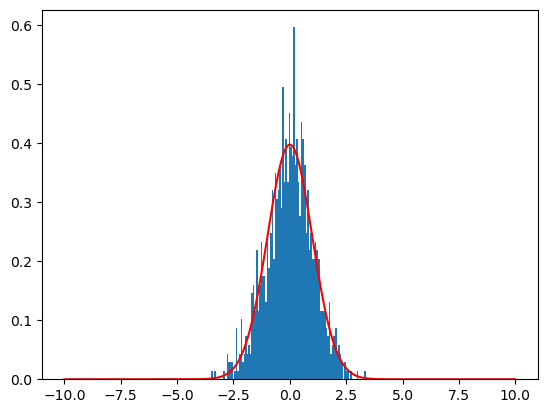

In [49]:
from scipy.stats import t

SAMPLE_SIZE = 100

def standard_error(ytrue, ypred):
    rss = 0
    for i in range(len(ytrue)):
        rss += (ytrue[i] - ypred[i]) ** 2
    return (rss / (SAMPLE_SIZE-2)) ** 0.5   # p=2

z_hist = []
for _ in range(1000):
    xlin = -1.0 + 2.0 * np.random.random(SAMPLE_SIZE)
    y = 0.0 * xlin + np.random.randn(SAMPLE_SIZE)
    
    intercept = np.ones(np.shape(xlin)[0])
    X = np.array([intercept, xlin]).T
    beta = np.linalg.inv(X.T @ X) @ X.T @ y

    ypred = X @ beta
    e = standard_error(y, ypred)
    s = np.linalg.inv(X.T @ X)[1][1]
    
    z = beta[1] / (((e**2)*s) ** 0.5)
    z_hist.append(z)

xs = np.linspace(-10, 10, 1000)
fig, ax = plt.subplots()
ax.hist(z_hist, bins=100, density=True)
ax.plot(xs, t.pdf(xs, SAMPLE_SIZE-2), color='red')
plt.show()

The simulation still fits the t-distribution well. 

f) You are given the following dataset:

[0.50155603 1.19902827]


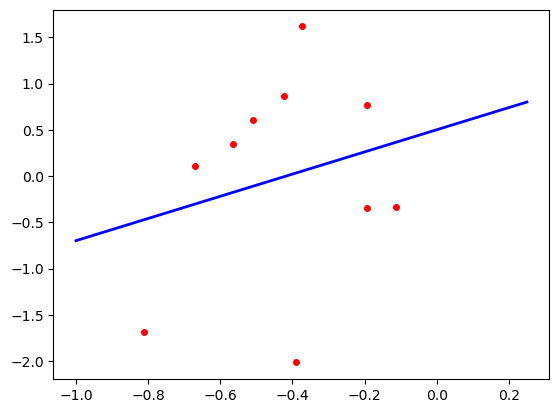

In [50]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([-0.1920605, -0.11290798, -0.56434374, -0.67052057, -0.19233284, -0.42403586, -0.8114285, -0.38986946, -0.37384161, -0.50930229])
y = np.array([-0.34063108, -0.33409286, 0.34245857, 0.11062295, 0.76682389, 0.86592388, -1.68912015, -2.01463592, 1.61798563, 0.60557414])

intercept = np.ones(np.shape(x)[0])
X = np.array([intercept, x]).T
beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y

print(beta_hat)

xplot = np.linspace(-1, .25, 20)
yestplot = beta_hat[0] + beta_hat[1] * xplot
plt.plot(xplot, yestplot,'b-', lw=2)
plt.plot(x, y, 'ro', markersize=4)
plt.show()

What is the probability of observing a dataset at least as extreme as the above assuming $\beta = 0$?

In [54]:
n = len(x)
def standard_error(ytrue, ypred):
    rss = 0
    for i in range(len(ytrue)):
        rss += (ytrue[i] - ypred[i])**2
    return (rss / (n-2))**0.5   # p=2

# t-value under the null hypothesis
# https://en.wikipedia.org/wiki/T-statistic
s = np.linalg.inv(X.T @ X)[1][1]
se = standard_error(y, X @ beta_hat)
t_val = (beta_hat[1] - 0.0) / (((se**2) * s)**0.5)
print(f"t-value {t_val}")

df = n - 2
# p-value for the two-tailed test
p_val = 2 * (1 - t.cdf(np.abs(t_val), df))
print(f"(target prob) p-value {p_val}")

t-value 0.6842586696389722
(target prob) p-value 0.5131420720905755


The p-value quantifies the probability of observing a t-value (which measures how many standard errors a coefficient estimate is away from the hypothesized value) as extreme as, or more extreme than, the one calculated from our data, assuming the null hypothesis is true. Here we have p-value=0.51, which indicates weak evidence against the null hypothesis. 